<a href="https://colab.research.google.com/github/biorsrch18/Natural-Language-Processing/blob/main/NLP_StockProject_prt1and2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

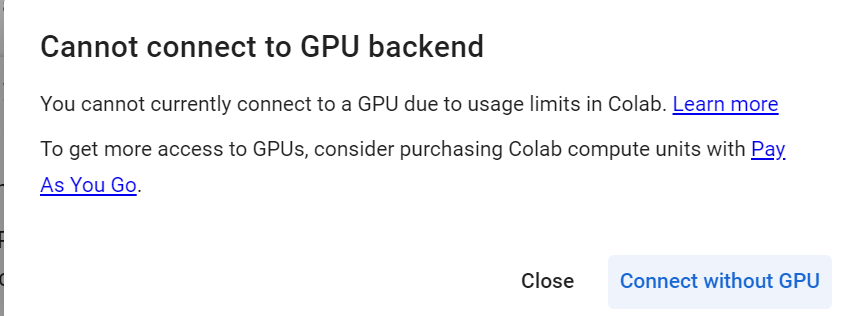

## **Installing and Importing Necessary Libraries**

In [ ]:
!pip install numpy --upgrade --force-reinstall
!pip install pandas --upgrade --force-reinstall

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Usin

In [ ]:
!pip uninstall -y numpy gensim
!pip install numpy gensim

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requ

In [ ]:
!pip install gensim

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

import nltk

# to remove common stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To tune the model
from sklearn.model_selection import GridSearchCV

# time related functions
import time
from datetime import datetime

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

# to work with transformer models

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# build linear regression model
from sklearn.linear_model import LinearRegression

# scaling data
from sklearn.preprocessing import StandardScaler

# check regression model's performance
from sklearn.metrics import mean_squared_error, r2_score

# build decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

import spacy
nlp = spacy.load('en_core_web_sm')

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import pickle
from sklearn.decomposition import PCA

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Loading the dataset**

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read csv
data = pd.read_csv('/content/drive/MyDrive/NLP/stock_news.csv')

## **Data Overview**

In [ ]:
df_stock= data.copy()

In [ ]:
df_stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
df_stock.tail()

,Date,News,Open,High,Low,Close,Volume,Label
344,2019-04-30,"Media mogul Oprah Winfrey, known for influencing millions with her opinions on diets and books, is considering which Democratic presidential candidate to endorse in 2020. She told the Hollywood Reporter she's ""quietly figuring out where I'm going to use my voice"" and will make a clear announcement",50.764999,50.849998,49.7775,48.70879,186139600,-1
345,2019-04-30,"European shares fell on Tuesday, with banks underperforming amid a decline in China's manufacturing activity and awaiting euro zone economic growth numbers. The pan-European STOXX 600 index dropped 0.7% while major indices fell except London's FTSE 100. Danske Bank plunged",50.764999,50.849998,49.7775,48.70879,186139600,-1
346,2019-04-30,"This article reports that the S&P 500 reached another record high close on Tuesday, marking its best four-month stretch since late 2010. Apple's strong quarterly results and positive earnings forecast helped ease concerns about the bull run's sustainability, despite a revenue miss from Google parent Alphabet. The",50.764999,50.849998,49.7775,48.70879,186139600,-1
347,2019-04-30,"The Federal Reserve is anticipated to keep interest rates unchanged in their upcoming meeting, with a likelihood of a rate cut expected later this year. The Fed Chairman's press conference may provide significant market impact as investors seek insights on economic growth and inflation. Apple's earnings report exceeded expectations, leading to a post-market surge in shares, while",50.764999,50.849998,49.7775,48.70879,186139600,-1
348,2019-04-30,"In the first quarter, South Korea's Samsung Electronics reported its weakest profit in over two years due to falls in chip prices and slowing demand for display panels. The tech giant expects improved results in the second half of 2019, driven by a pickup in memory chip and smartphone sales. However, memory chip",50.764999,50.849998,49.7775,48.70879,186139600,0


In [ ]:
df_stock.shape
print(f'There are {df_stock.shape[0]} rows and {df_stock.shape[1]} columns in this dataset.')

There are 349 rows and 8 columns in this dataset.


In [ ]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [ ]:
df_stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.444126e-02,7.151192e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
# Check Null Values
df_stock.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


In [ ]:
# Check dupicate values
df_stock.duplicated().sum()

0

In [ ]:
# check Unique values
df_stock.nunique()

,0
Date,71
News,349
Open,70
High,70
Low,71
Close,71
Volume,71
Label,3


In [ ]:
# convert data type of date from object to date-time
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

In [ ]:
df_stock['Date'].dt.year.value_counts()

,count
Date,
2019,349


### Observations_Data Overview
    There are 349 rows and 8 columns in stock_data dataset.
    There are 349 non-null observations in ezch column.
    This dataset has 8 columns out of which: 2 object type, 4 floating point type and 2 integer datatypes.
    Total memory usage is 21.9+KB
    There is no null and duplicate values.
    Data type of date should be changed to date/time type.
      

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

In [ ]:
df_stock.columns

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label'], dtype='object')

In [ ]:
# Use original string labels
stock = df_stock.copy()

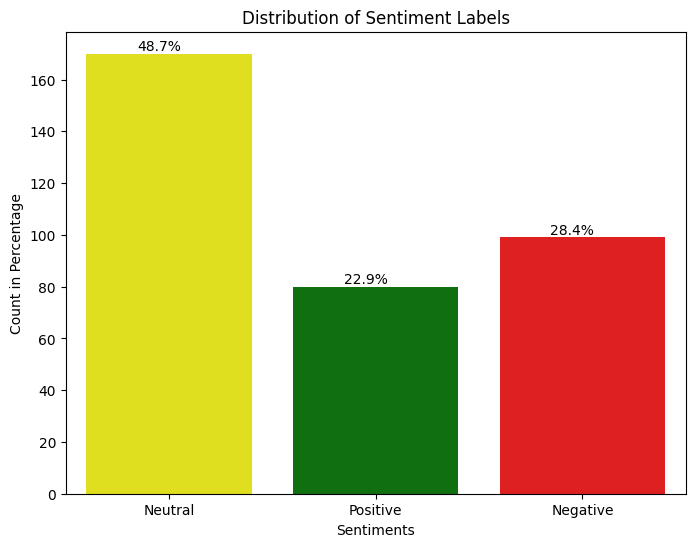

In [ ]:
# Define the dataframes for each sentiment
stock1 = stock.copy()
stock1 = pd.DataFrame(stock1)

# Create a mapping for the sentiment labels
sentiment_mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}

# Map the sentiment labels to the DataFrame
stock1['Label'] = stock1['Label'].map(sentiment_mapping)

# Define a custom color palette
custom_palette = {'Neutral': 'yellow', 'Positive': 'green', 'Negative': 'red'}

# Create the countplot with custom labels and colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=stock1, x="Label", order=['Neutral', 'Positive', 'Negative'], palette=custom_palette)

# Add percentage values to the countplot
total = len(stock1)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
ax.set_xlabel('Sentiments')
ax.set_ylabel('Count in Percentage')
ax.set_title('Distribution of Sentiment Labels')
plt.show();

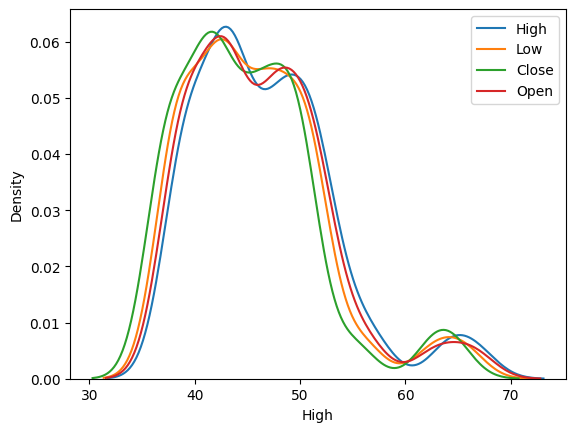

In [ ]:
for col in ['High', 'Low', 'Close', 'Open']:
    sns.kdeplot(data=stock1[col], label=col, palette= "viridis")
plt.legend()
plt.show()

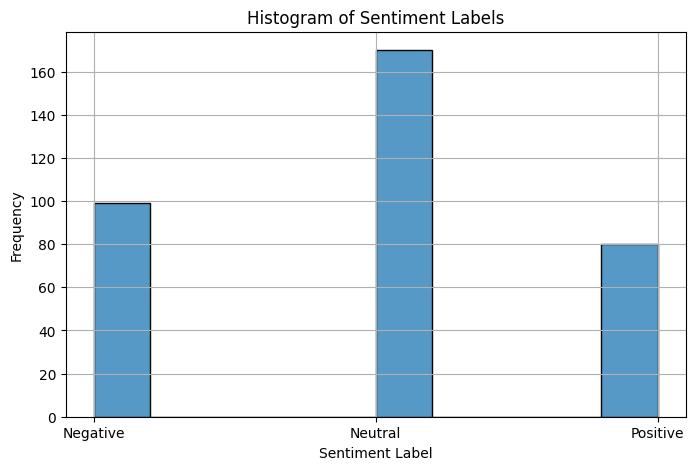

In [ ]:
# Observation on label
plt.figure(figsize=(8, 5))
sns.histplot(data=stock1, x='Label', discrete=False, palette='tab20')
plt.title('Histogram of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

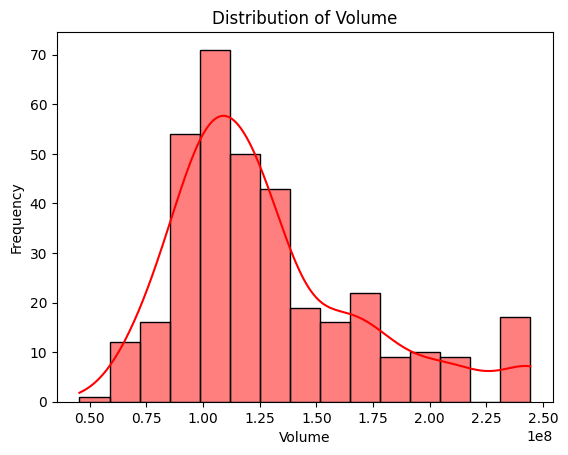

In [ ]:
# calculate volume
sns.histplot(data=stock1['Volume'], kde=True, color='red')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show();

In [ ]:
stock1['len_news'] = stock1['News'].apply(lambda x: len(str(x).split()))
stock1['len_chars'] = stock1['News'].apply(lambda x: len(str(x)))
print("Total number of characters in the news content:", stock1['len_chars'].sum())
print("Total number of words in the news content:", stock1['len_news'].sum())

Total number of characters in the news content: 108622
Total number of words in the news content: 16874


In [ ]:
stock1.columns

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label',
       'len_news', 'len_chars'],
      dtype='object')

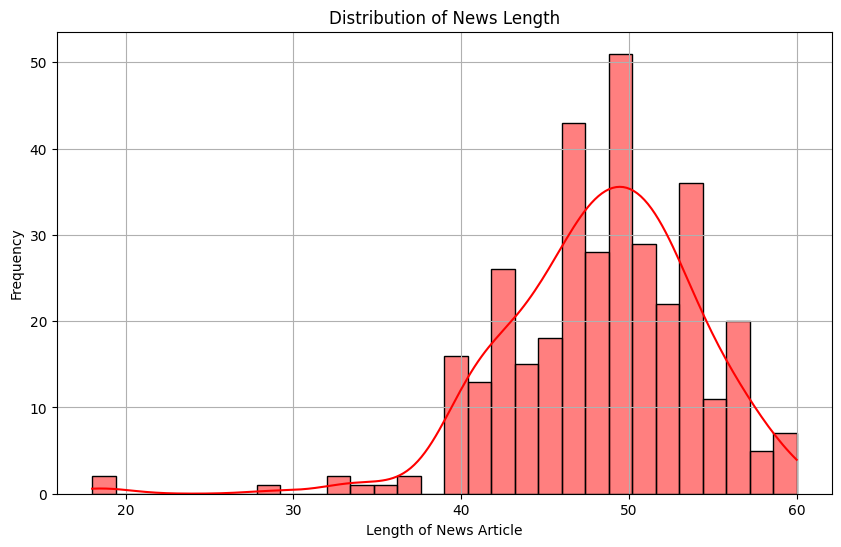

In [ ]:
# plot a histogram of len_news column
plt.figure(figsize=(10, 6))
sns.histplot(data=stock1, x='len_news', bins=30, kde=True, color='red')
plt.title('Distribution of News Length')
plt.xlabel('Length of News Article')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
stock1.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.0,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
len_news,349.0,48.34957,18.0,45.0,49.0,52.0,60.0,5.717324
len_chars,349.0,311.237822,110.0,290.0,315.0,336.0,394.0,39.079467


### Observation_EDA_Univariate
    The dataset has 349 news articles.
    Mosly neutral sentiments (48.7%), followed by negative (28.4%) and lastly positive sentiments (22.9%) were observed.
    The price (High, Low, Open, close) are rightly skewed.
    Total number of characters in the news content: 108622
    Total number of words in the news content: 16874
    The mean of news articles is about 48.34 word.
    The length of the articles varies from 18 to 60 words.
    The median length is 49 with a standard deviation of approximately 5.71 words.
    Length of news article is left skewed.
    Volume.

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

In [ ]:
# Correlation
stock_corr = stock1.copy()
corr_col = stock_corr.select_dtypes(include='number')

In [ ]:
corr_col.corr()

,Open,High,Low,Close,Volume,len_news,len_chars
Open,1.000000,0.998526,0.997900,0.996273,-0.066532,0.098254,0.090269
High,0.998526,1.000000,0.997328,0.997501,-0.045535,0.096306,0.088030
Low,0.997900,0.997328,1.000000,0.998453,-0.103518,0.095431,0.089712
Close,0.996273,0.997501,0.998453,1.000000,-0.079987,0.093788,0.085912
Volume,-0.066532,-0.045535,-0.103518,-0.079987,1.000000,-0.000379,-0.022335
len_news,0.098254,0.096306,0.095431,0.093788,-0.000379,1.000000,0.860037
len_chars,0.090269,0.088030,0.089712,0.085912,-0.022335,0.860037,1.000000


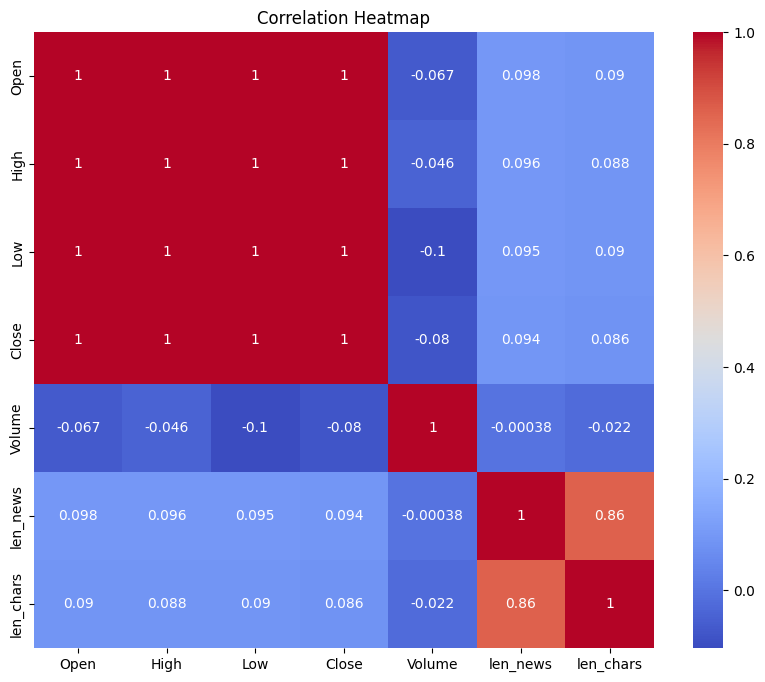

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_col.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Observation_EDA_Correlation
    1.Strong Positive Correlation Among Stock Prices
    Open, High, Low, and Close prices all have a perfect correlation of 1.0 with one another.
    Above graph shows multicollinearity.

    2.Weak/No Correlation with Volume
    Volume has very low or slightly negative correlations with the prices:
    Open: -0.067
    High: -0.046
    Low: -0.1
    Close: -0.08
    This implies trading volume doesn’t strongly move in sync with price for this dataset.

    3.Correlations with Open, Close, etc. are around 0.09
    4.Longer news articles may slightly relate to higher prices, but not strongly.

    4.len_news and len_chars have a strong correlation of 0.86



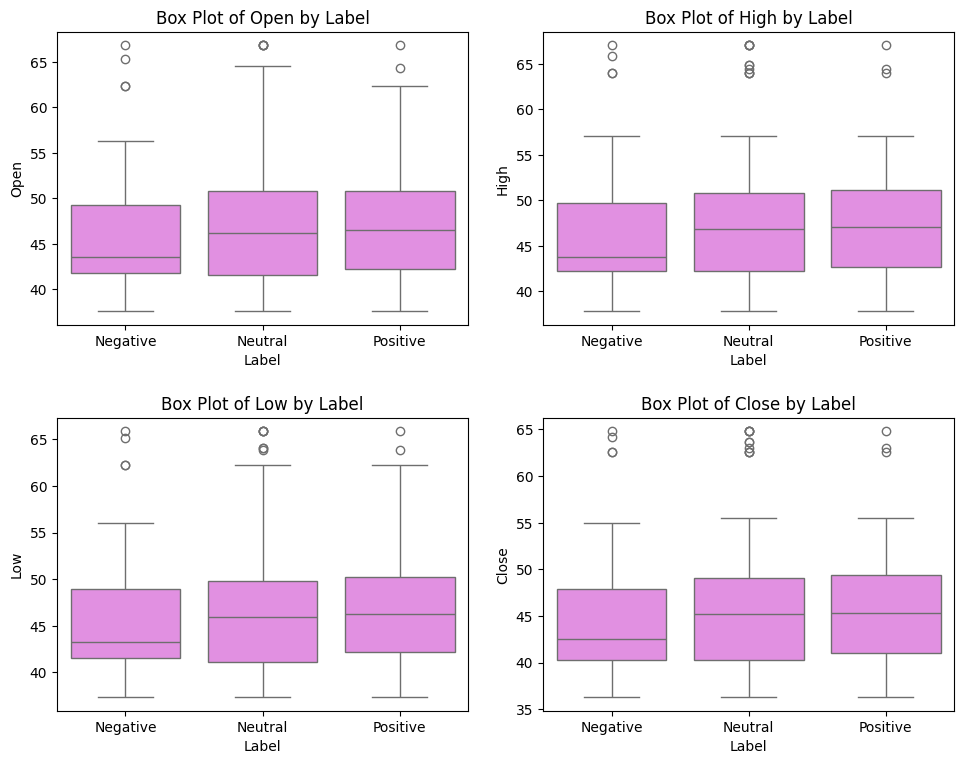

In [ ]:
# Sentiment polarity with Price
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock_corr, x="Label", y=variable, color='violet')
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel('Label')
    plt.ylabel(variable)
    plt.tight_layout(pad=2)

plt.show()

### Observation_Sentiment ploarity with Price
    The median Open price slightly increases from Negative → Neutral → Positive sentiment.
    Each plot shows a fair number of outliers across sentiments — an expected trait in stock data.
    IQR is fairly wide for all sentiments.
    Outliers are more frequent in Negative and Positive labels — possibly suggesting abrupt reactions to extreme news.

    High prices also show a slight upward trend in median as sentiment shifts from Negative to Positive.

    Low prices are also quite stable across sentiment groups.
    
    Closing prices also follow a similar pattern as the Open prices.

In [ ]:
# Date vs Price
stock1['Date'] = pd.to_datetime(stock1['Date']) # convert datatype to date
stock1['Date'] = stock1['Date'].dt.date # extract only date
stock1.set_index('Date', inplace=True)

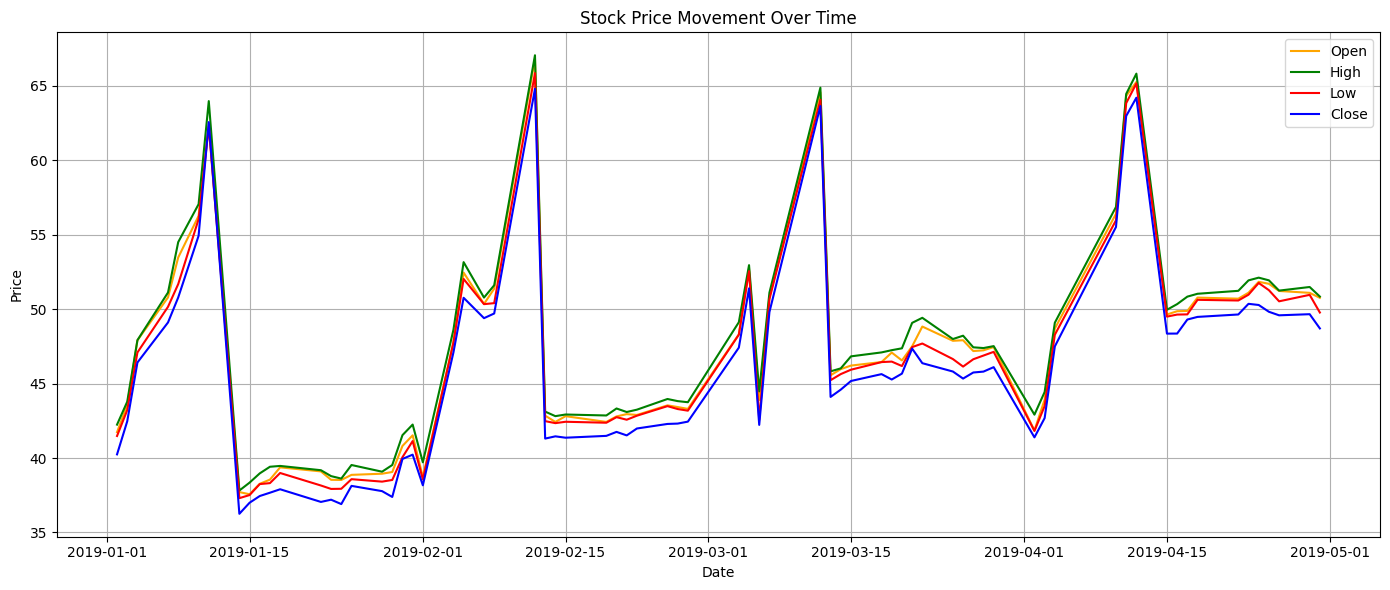

In [ ]:
# Plot all price types over time
plt.figure(figsize=(14, 6))
plt.plot(stock1['Open'], label='Open', color='orange')
plt.plot(stock1['High'], label='High', color='green')
plt.plot(stock1['Low'], label='Low', color='red')
plt.plot(stock1['Close'], label='Close', color='blue')

plt.title('Stock Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation_Date vs Price
    All four price types (Open, High, Low, Close) follow very similar patterns over time.
    The High and Low lines often serve as upper and lower bounds within a trading day.
    The Open and Close prices fall within this range, showing typical price fluctuation during the day.

## **Data Preprocessing**

In [ ]:
stock1.columns = stock1.columns.str.strip()

In [ ]:
print(stock1.columns)

Index(['News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label', 'len_news',
       'len_chars'],
      dtype='object')


In [ ]:
nu_stock = stock.copy()

In [ ]:
nu_stock['Date'] = pd.to_datetime(nu_stock['Date'])

In [ ]:
print(nu_stock.columns)

Index(['Date', 'News', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label'], dtype='object')


In [ ]:
print(nu_stock['Date'].describe())

count                              349
mean     2019-02-16 16:05:30.085959936
min                2019-01-02 00:00:00
25%                2019-01-14 00:00:00
50%                2019-02-05 00:00:00
75%                2019-03-22 00:00:00
max                2019-04-30 00:00:00
Name: Date, dtype: object


In [ ]:
# Extract relevant date components for summarization
nu_stock['Year'] = nu_stock['Date'].dt.year
nu_stock['Month'] = nu_stock['Date'].dt.month
nu_stock['Day'] = nu_stock['Date'].dt.day

# Print the statistical summary of the 'Date' column components
print("Year Summary:")
print(nu_stock['Year'].describe())
print("\nMonth Summary:")
print(nu_stock['Month'].describe())
print("\nDay Summary:")
print(nu_stock['Day'].describe())

Year Summary:
count     349.0
mean     2019.0
std         0.0
min      2019.0
25%      2019.0
50%      2019.0
75%      2019.0
max      2019.0
Name: Year, dtype: float64

Month Summary:
count    349.000000
mean       2.077364
std        1.177997
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Month, dtype: float64

Day Summary:
count    349.000000
mean      15.389685
std        9.351840
min        1.000000
25%        6.000000
50%       15.000000
75%       24.000000
max       31.000000
Name: Day, dtype: float64


### Observations
    The data is from the year 2019.
    The entries are done mostly in almost everyday of 1st 4 months.


## **Removing special characters from the text:**

In [ ]:
nu_stock.head()

,Date,News,Open,High,Low,Close,Volume,Label,Year,Month,Day
0,2019-01-02,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
1,2019-01-02,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
2,2019-01-02,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
3,2019-01-02,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2
4,2019-01-02,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",41.740002,42.244999,41.482498,40.246914,130672400,-1,2019,1,2


In [ ]:
# defining a function to remove the special characters

def remove_special_characters(text):
    pattern = '[^a-zA-Z0-9\s]+' # defining Regex pattern to match non- alpha-numeric charaters
    nu_text = ''.join(re.sub(pattern, '', text)) #finding specified pattern and replacing non-alphanumeric charaters with a blank string
    return nu_text

In [ ]:
# applying function to remove special characters
nu_stock['cleaned_news'] = nu_stock['News'].apply(remove_special_characters)

In [ ]:
# checking the data
nu_stock.loc[:, ['News', 'cleaned_news']].head()

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",The tech sector experienced a significant decline in the aftermarket following Apples Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo and TSMC saw their stocks drop in response to Apples downward revision of its revenue expectations for the quarter previously announced in January
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",Apple lowered its fiscal Q1 revenue guidance to 84 billion from earlier estimates of 8993 billion due to weaker than expected iPhone sales The announcement caused a significant drop in Apples stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as Nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",Apple cut its fiscal first quarter revenue forecast from 8993 billion to 84 billion due to weaker demand in China and fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks Apples shares fell 85 in post market trading while Asian suppliers like Hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",This news article reports that yields on longdated US Treasury securities hit their lowest levels in nearly a year on January 2 2019 due to concerns about the health of the global economy following weak economic data from China and Europe as well as the partial US government shutdown Apple
4,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",Apples revenue warning led to a decline in USD JPY pair and a gain in Japanese yen as investors sought safety in the highly liquid currency Apples underperformance in Q1 with forecasted revenue of 84 billion compared to analyst expectations of 915 billion triggered risk aversion mood in markets


In [ ]:
# Remove extra white spaces
nu_stock['cleaned_news'] = nu_stock['cleaned_news'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
# check data
nu_stock.loc[:, ['News', 'cleaned_news']].head()

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",The tech sector experienced a significant decline in the aftermarket following Apples Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo and TSMC saw their stocks drop in response to Apples downward revision of its revenue expectations for the quarter previously announced in January
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",Apple lowered its fiscal Q1 revenue guidance to 84 billion from earlier estimates of 8993 billion due to weaker than expected iPhone sales The announcement caused a significant drop in Apples stock price and negatively impacted related suppliers leading to broader market declines for tech indices such as Nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",Apple cut its fiscal first quarter revenue forecast from 8993 billion to 84 billion due to weaker demand in China and fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks Apples shares fell 85 in post market trading while Asian suppliers like Hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",This news article reports that yields on longdated US Treasury securities hit their lowest levels in nearly a year on January 2 2019 due to concerns about the health of the global economy following weak economic data from China and Europe as well as the partial US government shutdown Apple
4,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",Apples revenue warning led to a decline in USD JPY pair and a gain in Japanese yen as investors sought safety in the highly liquid currency Apples underperformance in Q1 with forecasted revenue of 84 billion compared to analyst expectations of 915 billion triggered risk aversion mood in markets


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Function to remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [ ]:
# Applying function to remove stopwords
nu_stock['cleaned_news'] = nu_stock['cleaned_news'].apply(remove_stopwords)

In [ ]:
#check data
nu_stock.loc[:, ['News', 'cleaned_news']].head()

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",tech sector experienced significant decline aftermarket following Apples Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo TSMC saw stocks drop response Apples downward revision revenue expectations quarter previously announced January
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",Apple lowered fiscal Q1 revenue guidance 84 billion earlier estimates 8993 billion due weaker expected iPhone sales announcement caused significant drop Apples stock price negatively impacted related suppliers leading broader market declines tech indices Nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",Apple cut fiscal first quarter revenue forecast 8993 billion 84 billion due weaker demand China fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales Airpods Macbooks Apples shares fell 85 post market trading Asian suppliers like Hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",news article reports yields longdated US Treasury securities hit lowest levels nearly year January 2 2019 due concerns health global economy following weak economic data China Europe well partial US government shutdown Apple
4,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",Apples revenue warning led decline USD JPY pair gain Japanese yen investors sought safety highly liquid currency Apples underperformance Q1 forecasted revenue 84 billion compared analyst expectations 915 billion triggered risk aversion mood markets


## Stemming
    This chops off the word endings to find the root or base form of words
    PorterStemmer() is one of the widely-used algorithms, it shortens the word to its root form by removing suffixes.

In [ ]:
# loading porterStemmer
ps = PorterStemmer()

In [ ]:
# function to perform Stemming
def perform_stemming(text):
    words = word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)


In [ ]:
#  Load spacy english model
nlp = spacy.load('en_core_web_sm')

# define a sample text
text = " ".join(nu_stock['cleaned_news'])

# process text using spacy
doc = nlp(text)

# Extract lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in doc]
lemmatized_pos = [token.pos_ for token in doc] # lemmatized parts of speech

# Join the lemmatized tokens back into a single string
lemmatized_text = " ".join(lemmatized_tokens)

# Print original and Lemmatized text
print("Original Text:", text)
print("\nLemmatized Text:", lemmatized_text)
print("\nLemmatized POS:", lemmatized_pos)
print("stemmed_text:", perform_stemming(text))

Original Text: tech sector experienced significant decline aftermarket following Apples Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo TSMC saw stocks drop response Apples downward revision revenue expectations quarter previously announced January Apple lowered fiscal Q1 revenue guidance 84 billion earlier estimates 8993 billion due weaker expected iPhone sales announcement caused significant drop Apples stock price negatively impacted related suppliers leading broader market declines tech indices Nasdaq 10 Apple cut fiscal first quarter revenue forecast 8993 billion 84 billion due weaker demand China fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales Airpods Macbooks Apples shares fell 85 post market trading Asian suppliers like Hon news article reports yields longdated US Treasury securities hit lowest levels nearly year January 2 2019 due concerns health global economy following weak economic data China Europe well partial US governm

In [ ]:
# check data
nu_stock.loc[:, ['News', 'cleaned_news']].head()

,News,cleaned_news
0,"The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January.",tech sector experienced significant decline aftermarket following Apples Q1 revenue warning Notable suppliers including Skyworks Broadcom Lumentum Qorvo TSMC saw stocks drop response Apples downward revision revenue expectations quarter previously announced January
1,"Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10",Apple lowered fiscal Q1 revenue guidance 84 billion earlier estimates 8993 billion due weaker expected iPhone sales announcement caused significant drop Apples stock price negatively impacted related suppliers leading broader market declines tech indices Nasdaq 10
2,"Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon",Apple cut fiscal first quarter revenue forecast 8993 billion 84 billion due weaker demand China fewer iPhone upgrades CEO Tim Cook also mentioned constrained sales Airpods Macbooks Apples shares fell 85 post market trading Asian suppliers like Hon
3,"This news article reports that yields on long-dated U.S. Treasury securities hit their lowest levels in nearly a year on January 2, 2019, due to concerns about the health of the global economy following weak economic data from China and Europe, as well as the partial U.S. government shutdown. Apple",news article reports yields longdated US Treasury securities hit lowest levels nearly year January 2 2019 due concerns health global economy following weak economic data China Europe well partial US government shutdown Apple
4,"Apple's revenue warning led to a decline in USD JPY pair and a gain in Japanese yen, as investors sought safety in the highly liquid currency. Apple's underperformance in Q1, with forecasted revenue of $84 billion compared to analyst expectations of $91.5 billion, triggered risk aversion mood in markets",Apples revenue warning led decline USD JPY pair gain Japanese yen investors sought safety highly liquid currency Apples underperformance Q1 forecasted revenue 84 billion compared analyst expectations 915 billion triggered risk aversion mood markets


### Observations_Data Preprocessing


In [ ]:
nu_stock.shape

(349, 12)

## **Train-Test split**

In [ ]:
X_train = nu_stock[(nu_stock['Date'] < '2019-04-01')].reset_index() # rows where the 'Date' is before '2019-04-01'
X_val = nu_stock[(nu_stock['Date'] >= '2019-04-01') & (nu_stock['Date'] < '2019-04-16')].reset_index()  # rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_test = nu_stock[nu_stock['Date'] >= '2019-04-16'].reset_index()  # rows where the 'Date' is from '2019-04-16' till the end.

In [ ]:
y_train = X_train['Label'].copy()
y_val = X_val['Label'].copy()
y_test = X_test['Label'].copy()
print("The shape of Training data",X_train.shape)
print("The shape of Validation data",X_val.shape)
print("The shape of Test data",X_test.shape)
print("The shape of train label",y_train.shape)
print("The shape of validation label",y_val.shape)
print("The shape of test label",y_test.shape)

The shape of Training data (286, 13)
The shape of Validation data (21, 13)
The shape of Test data (42, 13)
The shape of train label (286,)
The shape of validation label (21,)
The shape of test label (42,)


## **Word Embeddings**

### Word2Vec

In [ ]:
# Tokenize each cleaned_news string into a list of words
sentences = [sentence.split() for sentence in nu_stock['cleaned_news']]

In [ ]:
# Train Word2Vec
model_word2vec = Word2Vec(sentences, vector_size=400, window=5, min_count=1, workers=4)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_word2vec.wv.key_to_index)))

Length of the vocabulary is 3772


In [ ]:
# Checking word embedding on random word
model_word2vec.wv['Apple']

array([ 3.3421256e-04, -7.1031117e-04,  3.1698071e-03,  3.2690710e-03,
       -4.2041449e-04, -3.8894317e-03,  2.1280756e-04,  3.4673233e-03,
       -9.6630462e-04, -3.5634419e-04,  1.2067774e-03, -3.3373551e-03,
       -3.3190965e-03,  2.0034791e-03,  3.9147382e-04, -2.7558678e-03,
       -1.7279653e-03,  9.6629845e-04, -1.0510945e-03, -5.1656589e-03,
        3.0654988e-03,  6.9086143e-04,  3.2645348e-03,  4.5701888e-04,
        2.3494114e-03,  4.9870921e-04, -3.3123250e-04,  2.2652228e-03,
       -5.9270943e-03, -1.4458055e-03, -1.1877061e-03, -1.8159554e-03,
        3.0889423e-03, -2.6124401e-03, -8.6428027e-04, -7.5495167e-04,
        3.8360066e-03, -1.1634481e-03, -1.7955495e-04, -4.4674599e-03,
       -5.6114555e-03,  1.9465301e-03, -3.7350280e-03, -1.1001156e-03,
        1.9996574e-03, -4.1431194e-04, -3.6684610e-04,  2.1999150e-03,
        3.4405005e-03,  3.7759396e-03, -8.1714563e-04,  2.1011114e-05,
       -1.4181845e-03, -3.5435788e-03,  2.1289983e-03, -2.9702338e-03,
      

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_word2vec.wv.key_to_index)

In [ ]:
# Retrieving word vectors for all the words present in the model's vocabulary
word_vectors = model_word2vec.wv[words]

In [ ]:
# Creating a dictionary of words and their corresponding vectors
word_vector_dict = {word: vector for word, vector in zip(words, word_vectors)}

In [ ]:
def avg_vectorize_word2vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((400), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words = [word for word in doc.split() if word in model_word2vec.wv.key_to_index]

    # Adding the vector representations of the words
    if words:
        feature_vector = np.mean(model_word2vec.wv[words], axis=0)

        # Dividing by the number of words to get the average vector
        feature_vector = np.divide(feature_vector, len(words))

    return feature_vector

In [ ]:
avg_vectorize_word2vec(nu_stock['cleaned_news'][0])

array([ 7.28605573e-06, -7.80485789e-06,  2.23388161e-05,  4.17367664e-06,
        2.10962062e-05, -1.39370040e-05, -2.81890025e-05,  2.08625006e-05,
        2.51931324e-05,  1.17601085e-05, -1.43173665e-05, -2.21694099e-05,
       -2.18986061e-05,  6.52700965e-06,  1.52286693e-05, -2.43818686e-05,
       -3.04828591e-05,  3.58690727e-06,  8.68374082e-06, -2.93398207e-05,
        1.23908685e-05, -1.48623376e-05,  8.06102980e-06,  1.00573689e-05,
        9.57289672e-07,  5.36809512e-06, -1.95407870e-06,  1.71486718e-05,
       -3.59912592e-05, -6.41828865e-06,  2.81988810e-06, -6.46611352e-06,
        6.73316072e-06,  1.46946531e-05, -1.98588696e-05, -4.48968740e-06,
        2.70357068e-05,  6.42378268e-07, -9.46750151e-06, -2.71416611e-05,
       -2.31914091e-05,  1.91985396e-06, -9.39128768e-06,  5.79874177e-06,
        1.75533023e-05, -9.41228063e-06,  1.77536695e-05,  8.52922221e-06,
        2.20024631e-05,  1.62976339e-05,  1.69306422e-05, -1.72808104e-05,
       -6.37681842e-06, -

In [ ]:
avg_vectorize_word2vec("Apples revenue warning led decline USD JPY pair gain Japanese yen investors sought safety highly liquid currency")

array([-1.43455816e-06, -2.51488000e-05,  3.80658457e-05,  1.15311025e-06,
        2.51695983e-05, -1.38459054e-05, -8.19309298e-06,  2.90556818e-05,
        2.83551088e-07, -5.36940161e-06, -9.50320828e-06, -5.24283350e-05,
       -6.77178177e-05, -1.17718673e-05,  1.36912295e-05, -3.18891543e-05,
        8.54928567e-06,  4.08141968e-05,  5.21637230e-06, -3.73192488e-05,
       -1.26646977e-08,  8.41906694e-06,  4.68142389e-05,  2.09384616e-05,
       -6.54352925e-06,  1.14747154e-05,  1.86428690e-06,  5.95501831e-07,
       -4.88752376e-05,  1.02834738e-05,  2.49747336e-06, -3.50203336e-05,
        5.25532585e-07, -2.30281767e-05, -7.49307810e-06, -1.68528777e-06,
       -5.82208031e-06, -3.89494635e-05, -8.01749320e-06, -3.42351123e-05,
       -1.50357009e-05,  5.48342814e-06, -5.37507985e-05, -2.06095342e-06,
        3.36851372e-05, -1.87296282e-05,  3.79583216e-05, -1.85844165e-05,
        7.40368932e-06,  3.15685356e-05,  2.85082078e-05, -1.53815108e-05,
       -2.07463308e-05, -

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_word2vec = pd.DataFrame(X_train['cleaned_news'].apply(avg_vectorize_word2vec).tolist())
X_val_word2vec = pd.DataFrame(X_val['cleaned_news'].apply(avg_vectorize_word2vec).tolist())
X_test_word2vec = pd.DataFrame(X_test['cleaned_news'].apply(avg_vectorize_word2vec).tolist())

end = time.time()
print("Time taken to vectorize word2vec documents", end-start)

Time taken to vectorize word2vec documents 0.12300610542297363


In [ ]:
# Display the shape of word embedded dataframe
print("The shape of Training data",X_train_word2vec.shape)
print("The shape of Validation data",X_val_word2vec.shape)
print("The shape of Test data",X_test_word2vec.shape)

The shape of Training data (286, 400)
The shape of Validation data (21, 400)
The shape of Test data (42, 400)


In [ ]:
# Vectorized dataframe of training set
X_train_word2vec.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.000007,-0.000008,0.000022,0.000004,0.000021,-0.000014,-0.000028,0.000021,0.000025,0.000012,...,0.000011,-1.537998e-05,-0.000029,-0.000021,0.000011,0.000006,0.000024,-0.000014,0.000024,0.000012
1,0.000001,-0.000009,0.000007,0.000018,0.000017,-0.000022,-0.000021,0.000015,0.000010,0.000014,...,-0.000006,-9.015496e-06,-0.000034,-0.000006,0.000017,-0.000005,0.000004,-0.000002,0.000025,0.000002
2,0.000007,-0.000003,0.000015,0.000017,0.000010,-0.000013,-0.000013,0.000019,0.000011,0.000006,...,-0.000002,-1.274475e-05,-0.000029,0.000002,0.000025,-0.000006,0.000008,-0.000004,0.000026,0.000009
3,-0.000007,-0.000015,0.000018,0.000030,0.000022,-0.000026,-0.000010,0.000010,-0.000003,0.000008,...,0.000009,-9.203854e-06,-0.000033,0.000004,0.000022,-0.000025,0.000007,-0.000016,0.000011,0.000003
4,-0.000006,-0.000010,0.000023,0.000012,0.000005,-0.000009,-0.000003,0.000014,0.000006,-0.000014,...,0.000002,-8.736340e-07,-0.000024,-0.000003,0.000016,0.000013,0.000001,-0.000011,0.000016,0.000020


## **GloVe**

In [ ]:
# Path to GloVe word2vec-format file
glove_inp = '/content/drive/MyDrive/NLP/glove.6B.100d.txt'
glove_out = '/content/drive/MyDrive/NLP/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_inp, glove_out)

(400000, 100)

In [ ]:
# load standard GloVe model
filename = '/content/drive/MyDrive/NLP/glove.6B.100d.txt.word2vec'
model_glove = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_glove.key_to_index)))

Length of the vocabulary is 400000


In [ ]:
# Checking word embedding on random word
model_glove['revenue']

array([ 0.17132  , -0.042936 ,  0.48587  , -0.49912  ,  0.83222  ,
       -0.79533  , -0.39641  ,  0.0059214,  0.065537 , -0.35212  ,
        0.40528  , -0.12115  , -0.15325  , -0.46874  ,  0.2268   ,
       -0.80513  ,  0.065305 ,  0.25888  ,  0.4961   ,  1.0646   ,
        0.14317  ,  0.11955  , -0.35765  ,  1.0962   , -0.57384  ,
       -0.62014  ,  0.54423  , -0.20712  , -0.67822  , -0.82173  ,
        0.6037   ,  0.26209  , -0.18882  , -0.90291  , -0.181    ,
        0.43017  , -0.30814  ,  0.15839  , -0.0065962, -0.20375  ,
        0.52302  , -0.75001  , -0.35737  ,  0.38933  ,  0.2421   ,
       -0.1404   , -0.19481  , -0.97056  , -0.169    , -1.1695   ,
        0.089281 , -0.098044 ,  0.5469   ,  0.888    ,  0.42843  ,
       -1.8364   ,  0.083037 , -0.59659  ,  2.2736   ,  0.21042  ,
        0.21198  , -1.0437   , -0.66913  ,  0.5043   , -0.44588  ,
       -0.025209 , -0.1372   , -0.15207  ,  1.482    , -0.17329  ,
        0.69726  , -0.10271  ,  0.37622  , -0.016729 ,  0.1806

In [ ]:
# retrieving the word present in the GloVe Model's Vocabulary
glove_words = list(model_glove.key_to_index)

In [ ]:
# creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = {word: model_glove[word] for word in glove_words}

In [ ]:
def avg_vectorize_glove(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((100), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    vocab_words = [word for word in doc.split() if word in model_glove.key_to_index]

    # Adding the vector representations of the words
    for word in vocab_words:
        feature_vector = np.mean(model_glove[vocab_words], axis=0)

    # Dividing number of words to get the average vector
    if len(vocab_words) != 0:
      feature_vector /=len(vocab_words)

    return feature_vector


In [ ]:
# create dataframe of vectorized document
start = time.time()

X_train_glove = pd.DataFrame(X_train['cleaned_news'].apply(avg_vectorize_glove).tolist())
X_val_glove = pd.DataFrame(X_val['cleaned_news'].apply(avg_vectorize_glove).tolist())
X_test_glove = pd.DataFrame(X_test['cleaned_news'].apply(avg_vectorize_glove).tolist())

end = time.time()
print("Time taken to vectorize the glove documents", end-start)

Time taken to vectorize the glove documents 0.6132385730743408


In [ ]:
# Display the shape of glove dataframes
print("The shape of Training data",X_train_glove.shape)
print("The shape of Validation data",X_val_glove.shape)
print("The shape of Test data",X_test_glove.shape)

The shape of Training data (286, 100)
The shape of Validation data (21, 100)
The shape of Test data (42, 100)


In [ ]:
# vectorized dataframe of training set
X_train_glove.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001822,0.006504,0.007962,-0.001840,0.001500,-0.029087,-0.007743,-0.002467,-0.001491,-0.003696,...,0.002219,0.003544,-0.020527,-0.011559,-0.021283,0.006106,0.005124,-0.002334,0.025980,-0.004399
1,0.004502,0.009431,0.007506,0.002291,0.001407,-0.024286,-0.006300,-0.002611,-0.003633,-0.001285,...,0.000319,0.007089,-0.012398,-0.011439,-0.017390,0.009774,0.006360,-0.004017,0.021295,-0.003695
2,0.005013,0.011350,0.013221,-0.000957,0.004427,-0.023662,-0.006966,0.000695,-0.006140,-0.001686,...,0.002934,0.007003,-0.007834,-0.015267,-0.027216,0.007385,0.008201,-0.000036,0.025249,-0.004355
3,-0.003047,0.008599,0.015699,0.001789,-0.002775,-0.017595,-0.010678,-0.001282,-0.002138,-0.003632,...,0.004198,0.008665,-0.015520,0.001058,-0.017568,0.010643,0.008215,-0.009816,0.017390,-0.004370
4,0.005783,0.007914,0.009379,0.000885,-0.000923,-0.015689,-0.007399,-0.010789,-0.006351,-0.001543,...,0.001533,0.007274,-0.008754,-0.012556,-0.012296,0.008142,0.004739,-0.003421,0.010653,-0.002174


## **Sentence Transformer**

In [ ]:
from sentence_transformers import SentenceTransformer

# Defining sentence transformer model
model_st = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install --upgrade transformers sentence-transformers

Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 787.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 545.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.9 MB/s e

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.50.3
    Uninstalling transformers-4.50.3:
      Successfully uninstalled transformers-4.50.3
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1


In [ ]:
import torch
# Setting device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
encoded_input = tokenizer(nu_stock['cleaned_news'].tolist(), padding=True, truncation=True, return_tensors='pt')

In [ ]:
# shape of encoded_input
encoded_input["input_ids"].shape

torch.Size([349, 53])

In [ ]:
encoded_input["input_ids"]

tensor([[ 101, 6627, 4753,  ...,    0,    0,    0],
        [ 101, 6207, 6668,  ...,    0,    0,    0],
        [ 101, 6207, 3013,  ...,    0,    0,    0],
        ...,
        [ 101, 3720, 4311,  ...,    0,    0,    0],
        [ 101, 2976, 3914,  ...,    0,    0,    0],
        [ 101, 2034, 4284,  ...,    0,    0,    0]])

In [ ]:
# encoding dataset
start = time.time()

X_train_st = model_st.encode(X_train['cleaned_news'].values.tolist(), show_progress_bar=True, device=device)
X_val_st = model_st.encode(X_val['cleaned_news'].values.tolist(), show_progress_bar=True, device=device)
X_test_st = model_st.encode(X_test['cleaned_news'].values.tolist(), show_progress_bar=True, device=device)

end = time.time()
print("Time taken to vectorize the sentence transformer documents", end-start)

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken to vectorize the sentence transformer documents 16.273355722427368


In [ ]:
# Display shape of transformer_encoded dataframes
print("The shape of Training data",X_train_st.shape)
print("The shape of Validation data",X_val_st.shape)
print("The shape of Test data",X_test_st.shape)


The shape of Training data (286, 384)
The shape of Validation data (21, 384)
The shape of Test data (42, 384)


In [ ]:
# Embeded dataframe
X_train_st[0]

array([ 1.30746840e-02, -8.97685718e-03,  5.81591465e-02,  3.30424793e-02,
        1.55728906e-02,  2.81420816e-03,  5.94942132e-03,  3.76184247e-02,
        1.82332881e-02, -1.78980399e-02,  3.83225009e-02,  3.27428170e-02,
        6.14313222e-02, -1.41051477e-02, -2.91016567e-02, -1.06486762e-02,
        1.74384154e-02, -9.39164832e-02, -3.32935564e-02, -4.25560810e-02,
       -5.20266220e-02, -2.80260276e-02, -5.08627221e-02,  3.60033475e-02,
        7.65906423e-02, -9.40342154e-03, -3.37541699e-02,  6.85947686e-02,
       -6.13675676e-02, -3.99102531e-02, -1.03593729e-01,  1.22365013e-01,
        7.17828870e-02,  3.27791199e-02,  1.56759694e-02, -8.77554156e-03,
        8.01709890e-02, -5.36734350e-02,  7.45806191e-03, -4.44759242e-02,
       -1.39384614e-02, -1.14668757e-02, -8.80431235e-02,  4.71723406e-03,
        3.22586559e-02, -4.60839085e-02,  1.83364318e-03, -4.83830236e-02,
        5.69209456e-03,  2.28495616e-02, -4.76287911e-03, -1.05801588e-02,
        5.96257783e-02,  

### Observations_ Model_Building
    we have used pre-trained models to encode the dataset by word2vec, GloVe and Sentence Transformer
  
    Word2Vec was the fastest (0.123s), followed by GloVe (0.613).
    Sentence Transformers, being a deep contextual model, required the most time (16.273s).
    It may offer superior performance in downstream tasks due to its ability to capture sentence-level semantics.

## **Sentiment Analysis**

### Utility Functions


In [ ]:
from numpy import linalg
# defining function to compute cosine similarity between two embedding vectors
def cosine_score(text):
  # encoding the text
  embedding = model_st.encode(text, convert_to_tensor=True)
  # calculating L2 norm of embedding vector
  norm1 = np.linalg.norm(embedding[0])
  norm2 = np.linalg.norm(embedding[1])

  # computing cosine similarity
  cosine_similarity = (np.dot(embedding[0], embedding[1]) / (norm1 * norm2))

  return cosine_similarity


In [ ]:
def top_k_similar_sentences(query, sentences, k=5):
    # encode the query
    qry_embedding = model_st.encode(query)

    # encode the sentence list
    sentence_embeddings = model_st.encode(sentences)

    # calculate norms
    norm_qry = np.linalg.norm(qry_embedding)
    norm_sentences = np.linalg.norm(sentence_embeddings, axis=1)

    # compute cosine similarity
    scores = np.dot(sentence_embeddings, qry_embedding) / (norm_sentences * norm_qry)

    # get indices of top-k highest scores
    top_k_idx = np.argsort(scores)[-k:][::-1]

    # return top k sentences with their scores
    return [(sentences[i], scores[i]) for i in top_k_idx]

In [ ]:
query_text = "Apple's revenue warning led decline USD JPY pair gain Japanese yen investors sought safety highly liquid currency"

top_k_rvs = top_k_similar_sentences(query_text, nu_stock['cleaned_news'])

for i, (sentence, score) in enumerate(top_k_rvs):
    print(f"{i+1}. {sentence} \n   Similarity Score: {score:.4f}\n")

1. Apples revenue warning led decline USD JPY pair gain Japanese yen investors sought safety highly liquid currency Apples underperformance Q1 forecasted revenue 84 billion compared analyst expectations 915 billion triggered risk aversion mood markets 
   Similarity Score: 0.8539

2. news article investors concerns slowing Chinese global economy amplified Apples revenue warning led significant surge Japanese yen yen reached biggest oneday rise 20 months gains 4 versus dollar trend driven automated 
   Similarity Score: 0.6878

3. Fears global economic slowdown led decline US dollar Thursday yen gained ground due status safe currency USD index slipped 96 USD JPY dropped 10761 yen strengthened 44 
   Similarity Score: 0.6656

4. early Asian trading Thursday Japanese yen surged US dollar Australian dollar collapsed thin markets due massive stop loss sales triggered Apples earnings warning sluggish iPhone sales China risk aversion yen reached lowest levels US dollar since March 
   Similar

### Confusion matrix_functions

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='coolwarm', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### model_word2ved

In [ ]:
# model  building
model_word2vec = RandomForestClassifier(n_estimators=100, random_state=120)
model_word2vec.fit(X_train_word2vec, y_train)

RandomForestClassifier(random_state=120)

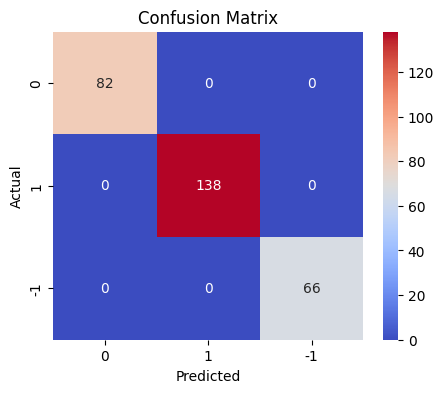

In [ ]:
plot_confusion_matrix(model_word2vec, X_train_word2vec, y_train)

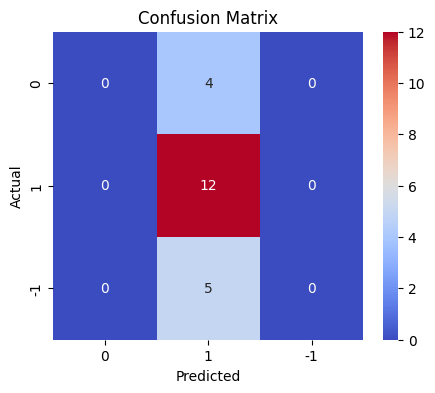

In [ ]:
plot_confusion_matrix(model_word2vec, X_val_word2vec, y_val)

In [ ]:
# metrics on training data
final_train_w2v = model_performance_classification_sklearn(model_word2vec, X_train_word2vec, y_train)
final_train_w2v

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# metrices on validation data
final_val_w2v = model_performance_classification_sklearn(model_word2vec, X_val_word2vec, y_val)
final_val_w2v

,Accuracy,Recall,Precision,F1
0,0.571429,0.571429,0.326531,0.415584


### model_GloVe

In [ ]:
# Build randomforest model
model_glove = RandomForestClassifier(n_estimators=100, random_state=120)
model_glove.fit(X_train_glove, y_train)

RandomForestClassifier(random_state=120)

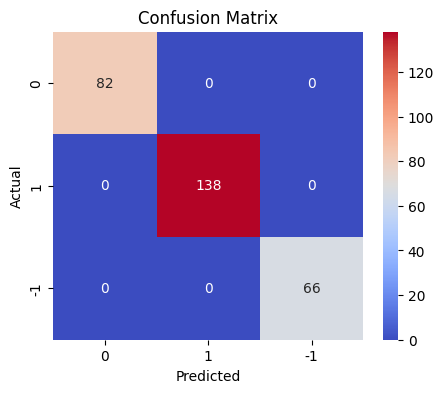

In [ ]:
# Train_confusion matrix
train_glove = plot_confusion_matrix(model_glove, X_train_glove, y_train)
train_glove


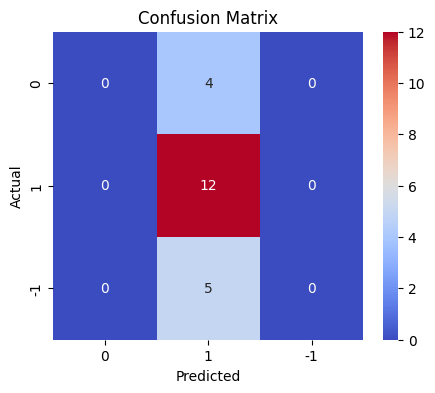

In [ ]:
# val_confusion matrix
val_glove = plot_confusion_matrix(model_glove, X_val_glove, y_val)
val_glove

In [ ]:
# metrics on training
final_train_glove = model_performance_classification_sklearn(model_glove, X_train_glove, y_train)
final_train_glove

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# metrics on validation
final_val_glove = model_performance_classification_sklearn(model_glove, X_val_glove, y_val)
final_val_glove

,Accuracy,Recall,Precision,F1
0,0.571429,0.571429,0.326531,0.415584


### model_sentence_transformer

In [ ]:
# build randomforest model
model_st = RandomForestClassifier(n_estimators=100, random_state=120)
model_st.fit(X_train_st, y_train)

RandomForestClassifier(random_state=120)

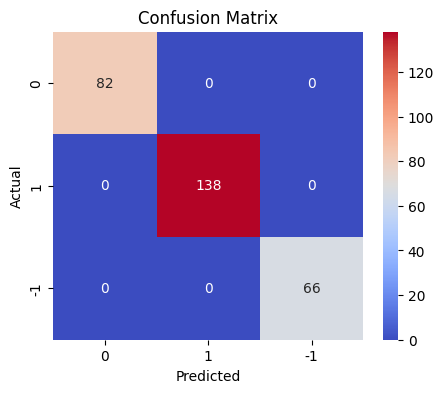

In [ ]:
# Training confusion matrix
train_st = plot_confusion_matrix(model_st, X_train_st, y_train)
train_st

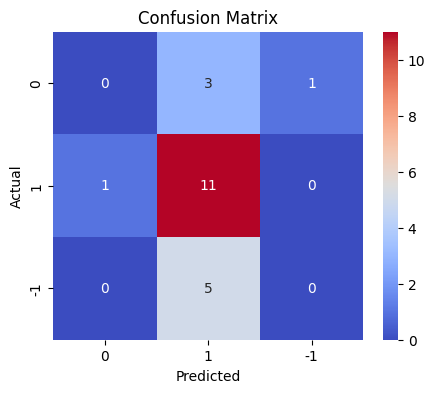

In [ ]:
# validation confusion matrix
val_st = plot_confusion_matrix(model_st, X_val_st, y_val)
val_st

In [ ]:
# metric on training
final_train_st = model_performance_classification_sklearn(model_st, X_train_st, y_train)
final_train_st

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# metric on validation
final_val_st = model_performance_classification_sklearn(model_st, X_val_st, y_val)
final_val_st

,Accuracy,Recall,Precision,F1
0,0.52381,0.52381,0.330827,0.40553


## Tune Models

### model_word2vec


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

start = time.time()

# Initialize the model
tune_model_word2vec = RandomForestClassifier(random_state = 100)

# Define parameter grid
parameters = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'max_features': ['sqrt', 'log2', None],
}

# GridSearchCV
grid_search = GridSearchCV(tune_model_word2vec, param_grid=parameters, scoring='f1_weighted', cv=5)
grid_search.fit(X_train_word2vec, y_train)

end = time.time()
print("Time taken to tune the model", end-start)

# Set the clf to the best combination of parameters
t_model_word2vec = grid_search.best_estimator_

# Fit the best algorithm to the data.
t_model_word2vec.fit(X_train_word2vec, y_train)

Time taken to tune the model 1597.9430878162384


RandomForestClassifier(max_depth=9, max_features='log2', min_samples_split=6,
                       random_state=100)

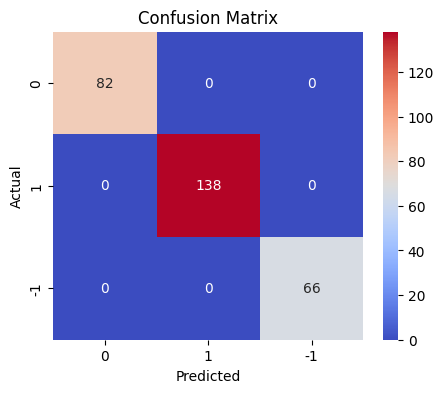

In [ ]:
# plot confusion matrix between tuned, train
plot_confusion_matrix(t_model_word2vec, X_train_word2vec, y_train)

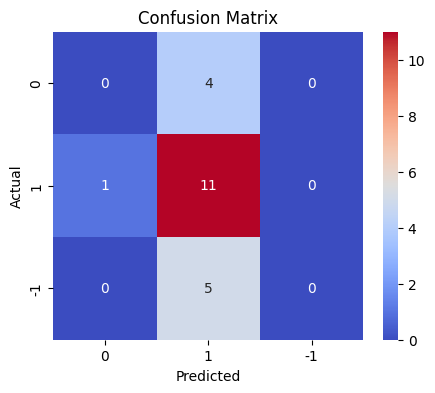

In [ ]:
# plot confusion matrix between tuned, validation
plot_confusion_matrix(t_model_word2vec, X_val_word2vec, y_val)

In [ ]:
# metric on training
tune_train_word2vec = model_performance_classification_sklearn(t_model_word2vec, X_train_word2vec, y_train)
tune_train_word2vec

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# metric on validation
tune_val_word2vec = model_performance_classification_sklearn(t_model_word2vec, X_val_word2vec, y_val)
tune_val_word2vec

,Accuracy,Recall,Precision,F1
0,0.52381,0.52381,0.314286,0.392857


###Tune_model_GloVe

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

start = time.time()

# Initialize the model
tune_model_glove = RandomForestClassifier(random_state = 120)

# Define parameter grid
parameters_glove = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'max_features': ['sqrt', 'log2', None],
}

# GridSearchCV
grid_search_glove = GridSearchCV(tune_model_glove, param_grid=parameters_glove, scoring='f1_weighted', cv=5)
grid_search_glove.fit(X_train_glove, y_train)

end = time.time()
print("Time taken to tune the GloVe model:", end - start)

# Set the classifier to the best combination of parameters
t_model_glove = grid_search_glove.best_estimator_

# Fit the best model to the training data
t_model_glove.fit(X_train_glove, y_train)

Time taken to tune the GloVe model: 592.1932101249695


RandomForestClassifier(max_depth=9, max_features='log2', min_samples_split=4,
                       random_state=120)

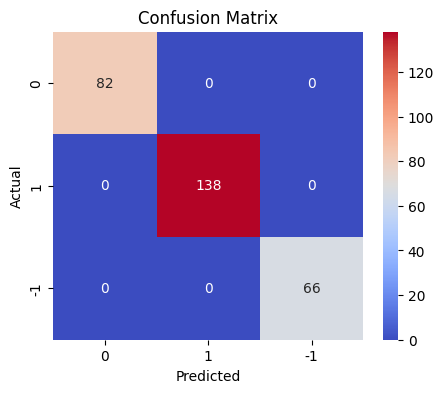

In [ ]:
# plot confusion matrix between tuned, train
plot_confusion_matrix(t_model_glove, X_train_glove, y_train)

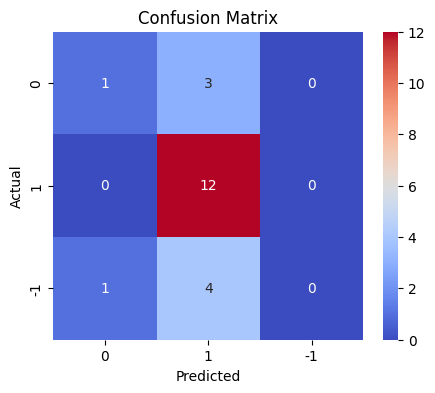

In [ ]:
# plot confusion matrix between tuned, validation
plot_confusion_matrix(t_model_glove, X_val_glove, y_val)

In [ ]:
# metric on training
tune_train_glove = model_performance_classification_sklearn(t_model_glove, X_train_glove, y_train)
tune_train_glove

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# metric on validation
tune_val_glove = model_performance_classification_sklearn(t_model_glove, X_val_glove, y_val)
tune_val_glove

,Accuracy,Recall,Precision,F1
0,0.619048,0.619048,0.45614,0.505888


### tune_model_ST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

start = time.time()

# Initialize the model
tune_model_st = RandomForestClassifier(random_state = 120)

# Define parameter grid
parameters_st = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10),
    'max_features': ['sqrt', 'log2', None],
}

# GridSearchCV
grid_search_st = GridSearchCV(tune_model_st, param_grid=parameters_st, scoring='f1_weighted', cv=5)
grid_search_st.fit(X_train_st, y_train)

end = time.time()
print("Time taken to tune the Sentence Transformer model:", end - start)

# Set the classifier to the best combination of parameters
t_model_st_final = grid_search_st.best_estimator_

# Fit the best model to the training data
t_model_st_final.fit(X_train_st, y_train)

Time taken to tune the Sentence Transformer model: 1503.1936852931976


RandomForestClassifier(max_depth=9, max_features=None, min_samples_split=3,
                       random_state=120)

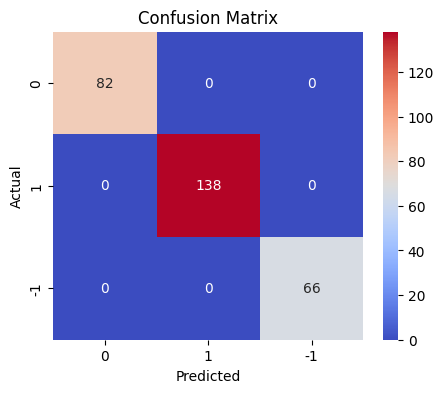

In [ ]:
# plot confusion matrix between tuned, train
plot_confusion_matrix(t_model_st_final, X_train_st, y_train)

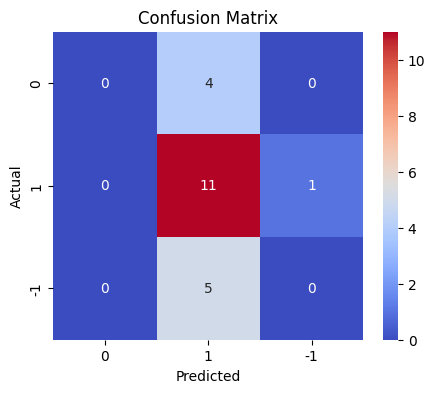

In [ ]:
# plot confusion matrix between tuned, validation
plot_confusion_matrix(t_model_st_final, X_val_st, y_val)

In [ ]:
# metric on training
tune_train_st = model_performance_classification_sklearn(t_model_st_final, X_train_st, y_train)
tune_train_st

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# metric on validation
tune_val_st = model_performance_classification_sklearn(t_model_st_final, X_val_st, y_val)
tune_val_st

,Accuracy,Recall,Precision,F1
0,0.52381,0.52381,0.314286,0.392857


### Model Performances & Model Selection

In [ ]:
# Train(all models and tuned models) performance comparison

models_train_comp = pd.concat(
     [final_train_w2v.T,
     final_train_glove.T,
     final_train_st.T,
     tune_train_word2vec.T,
     tune_train_glove.T,
     tune_train_st.T,
     ],axis=1
)
models_train_comp.columns = [
    "Model_Word2Vec",
    "Model_GloVe",
    "Model_Sentence Transformer",
    "Tuned_Model_Word2Vec",
    "Tuned_Model_GloVe",
    "Tuned_Model_Sentence Transformer"
    ]

print("Training performance comparison:")
models_train_comp

Training performance comparison:


,Model_Word2Vec,Model_GloVe,Model_Sentence Transformer,Tuned_Model_Word2Vec,Tuned_Model_GloVe,Tuned_Model_Sentence Transformer
Accuracy,1.0,1.0,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0,1.0,1.0
F1,1.0,1.0,1.0,1.0,1.0,1.0


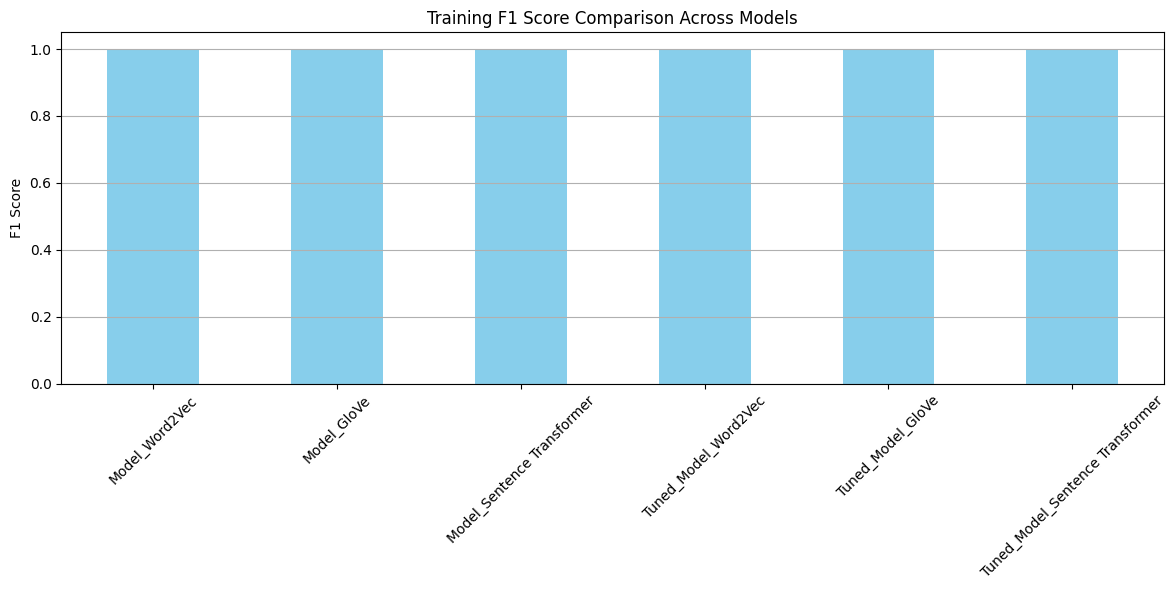

In [ ]:
plt.figure(figsize=(12, 6))
models_train_comp = models_train_comp.loc['F1'].plot(kind='bar', color='skyblue')
plt.title('Training F1 Score Comparison Across Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show();


In [ ]:
# validation performance comparision
models_val_comp = pd.concat(
    [final_val_w2v.T,
    final_val_glove.T,
    final_val_st.T,
    tune_val_word2vec.T,
    tune_val_glove.T,
    tune_val_st.T,
    ],axis=1
)
models_val_comp.columns = [
    "Model_Word2Vec",
    "Model_GloVe",
    "Model_Sentence Transformer",
    "Tuned_Model_Word2Vec",
    "Tuned_Model_GloVe",
    "Tuned_Model_Sentence Transformer"]

print("Validation performance comparison:")
models_val_comp

Validation performance comparison:


,Model_Word2Vec,Model_GloVe,Model_Sentence Transformer,Tuned_Model_Word2Vec,Tuned_Model_GloVe,Tuned_Model_Sentence Transformer
Accuracy,0.571429,0.571429,0.523810,0.523810,0.619048,0.523810
Recall,0.571429,0.571429,0.523810,0.523810,0.619048,0.523810
Precision,0.326531,0.326531,0.330827,0.314286,0.456140,0.314286
F1,0.415584,0.415584,0.405530,0.392857,0.505888,0.392857


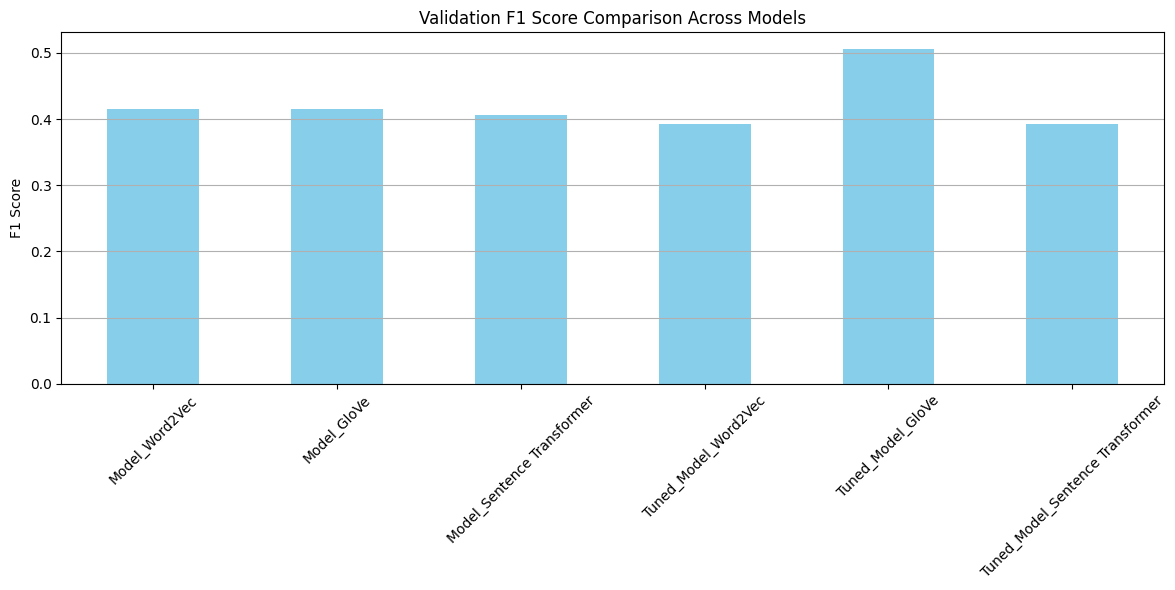

In [ ]:
plt.figure(figsize=(12, 6))
models_val_comp.loc['F1'].plot(kind='bar', color='skyblue')
plt.title('Validation F1 Score Comparison Across Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

def evaluate_model(model, X_train, y_train, X_val, y_val, model_name=""):
    print(f"\n--- {model_name} ---")
    print("Training Metrics:")
    y_train_pred = model.predict(X_train)
    print(classification_report(y_train, y_train_pred))
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

    print("\nValidation Metrics:")
    y_val_pred = model.predict(X_val)
    print(classification_report(y_val, y_val_pred))
    print("Accuracy:", accuracy_score(y_val, y_val_pred))
    print("F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

#Check with test data
### Best model - Tuned_Model_GloVe

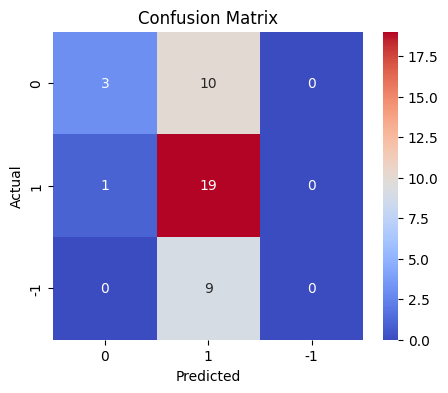

In [ ]:
plot_confusion_matrix(t_model_glove, X_test_glove, y_test)

In [ ]:
# Metrics on Training data
final_test_glove = model_performance_classification_sklearn(t_model_glove, X_test_glove, y_test)
final_test_glove

,Accuracy,Recall,Precision,F1
0,0.52381,0.52381,0.470238,0.421231


### Observations
    
    All models(base)- word2vec, GloVe, and Sentence transformer showed overfitting with training set.
    Even, tuned models also showed overfitting with training dataset.
    Best and final model was tuned_GloVe model having best accuracy, recall, precision and F1 score.

    Tuned_Glove_Model's performance was checked with test data and showed very less but best of all model's accuracy.
    It was only 52.3%.
    
    






# Weekely News Summarization

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
!apt-get update
!apt-get install -y build-essential cmake libopenblas-dev ninja-build

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,542 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,099 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packag

In [ ]:
!pip install numpy --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00


# Function to download the model from the Hugging Face model hub

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NLP/stock_news.csv')

In [ ]:
db_stock = data.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
llm = Llama(
    model_path=model_path,
    n_ctx=4500,
    n_gpu_layers=100,
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

#### Aggregating the data weekly

In [ ]:
db_stock["Date"] = pd.to_datetime(db_stock['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = db_stock.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
wkly_data = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=500, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=0.5, #Complete the code to set the value for temperature.
      top_p= 0.7, #Complete the code to set the value for top_p
      top_k=55, #Complete the code to set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]
    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [ ]:
wkly_data.shape

(18, 2)

In [ ]:
wkly_data.head()

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...


In [ ]:
# load news article from dataframe
news = wkly_data.loc[0, 'News']
print("Length of news (in words):", len(news.split()))
print(news)

Length of news (in words): 2562
 The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple's stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple's shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news ar

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

In [ ]:
prompt = """
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
"""

In [ ]:
news = wkly_data['News'].iloc[0]

In [ ]:
%%time
summary = response_mistral_1(prompt, news)
summary

llama_perf_context_print:        load time = 2687348.14 ms
llama_perf_context_print: prompt eval time = 2687342.36 ms /  3889 tokens (  691.01 ms per token,     1.45 tokens per second)
llama_perf_context_print:        eval time =  222548.27 ms /   164 runs   ( 1357.00 ms per token,     0.74 tokens per second)
llama_perf_context_print:       total time = 2910036.24 ms /  4053 tokens


CPU times: user 1h 15min 29s, sys: 12.5 s, total: 1h 15min 41s
Wall time: 48min 30s


' [\n          {\n             "topic_1": "Apple\'s Q1 revenue warning and its impact on tech stocks and indices",\n             "topic_2": "Global economic concerns following weak economic data from China and Europe",\n             "topic_3": "Apple\'s underperformance and its effect on related suppliers and the US dollar",\n             "topic_4": "Safe haven assets like gold and Japanese yen gaining value due to market volatility",\n             "topic_5": "Ongoing trade tensions between the US and China and their impact on firm profits and oil prices",\n             "topic_6": "Record investments in gold due to economic downturn, uncertainty, and potential Fed rate hikes"\n          }\n       ]'

##### Checking the model output on the weekly data

In [ ]:
%%time
wkly_data['Summary'] = wkly_data['News'].progress_apply(lambda x: response_mistral_1(prompt, x))

  0%|          | 0/18 [00:00<?, ?it/s]Llama.generate: 3888 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time = 2687348.14 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =  282227.31 ms /   181 runs   ( 1559.27 ms per token,     0.64 tokens per second)
llama_perf_context_print:       total time =  282401.09 ms /   182 tokens
 11%|█         | 2/18 [04:42<37:39, 141.24s/it]Llama.generate: 144 prefix-match hit, remaining 2234 prompt tokens to eval
llama_perf_context_print:        load time = 2687348.14 ms
llama_perf_context_print: prompt eval time = 1489790.24 ms /  2234 tokens (  666.87 ms per token,     1.50 tokens per second)
llama_perf_context_print:        eval time =  472027.58 ms /   378 runs   ( 1248.75 ms per token,     0.80 tokens per second)
llama_perf_context_print:       total time = 1962244.93 ms /  2612 toke

CPU times: user 8h 47min 4s, sys: 1min 49s, total: 8h 48min 54s
Wall time: 6h 34min 31s


##### Formatting the model output

In [ ]:
wkly_data.drop(columns=['Main_Topics'], inplace=True)

In [ ]:
wkly_data.head()

,Date,News,Summary,ParsedSummary
0,2019-01-06,The tech sector experienced a significant dec...,{'topic_1': 'Apple's Q1 revenue warning and it...,{'topic_1': 'Apple's Q1 revenue warning and it...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{'topic_1': '5G Smartphones', 'topic_2': 'Sams...","{'topic_1': '5G Smartphones', 'topic_2': 'Sams..."
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{'topic_1': 'U.S. stock market', 'topic_2': 'G...","{'topic_1': 'U.S. stock market', 'topic_2': 'G..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",{},{}
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,{},{}


In [ ]:
# Applying the JSON extractor to the weekly data
wkly_data['Summary'] = wkly_data['Summary'].apply(extract_json_data)

# Display formatted summaries
wkly_data[['Date', 'Summary']].head()

,Date,Summary
0,2019-01-06,{'topic_1': 'Apple's Q1 revenue warning and it...
1,2019-01-13,"{'topic_1': '5G Smartphones', 'topic_2': 'Sams..."
2,2019-01-20,"{'topic_1': 'U.S. stock market', 'topic_2': 'G..."
3,2019-01-27,{}
4,2019-02-03,{}


In [ ]:
def extract_json_data(text):
    import re
    import json

    # If it's already a dict, return as-is
    if isinstance(text, dict):
        return text

    try:
        text = text.strip()

        # Find JSON-like structure
        json_match = re.search(r'(\{.*\}|\[.*\])', text, re.DOTALL)
        if not json_match:
            print("Warning: JSON object not found in response:", text[:300])
            return {}

        json_text = json_match.group(1)

        # Fix common formatting issues
        json_text = re.sub(r",\s*}", "}", json_text)
        json_text = re.sub(r",\s*]", "]", json_text)

        return json.loads(json_text)

    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        print("Raw input:\n", text[:300])
        return {}

In [ ]:
if 'ParsedSummary' not in wkly_data.columns:
    wkly_data['ParsedSummary'] = wkly_data['Summary'].apply(extract_json_data)

In [ ]:
# Preview parsed results
wkly_data[['Date', 'ParsedSummary']].head()

,Date,ParsedSummary
0,2019-01-06,{'topic_1': 'Apple's Q1 revenue warning and it...
1,2019-01-13,"{'topic_1': '5G Smartphones', 'topic_2': 'Sams..."
2,2019-01-20,"{'topic_1': 'U.S. stock market', 'topic_2': 'G..."
3,2019-01-27,{}
4,2019-02-03,{}


## **Conclusions**

    We performed the extraction, structuring, and classification of news articles by leveraging modern NLP techniques.
    Conducted Exploratory Data Analysis (EDA) and data preprocessing, and built robust models using various machine learning tools.
    Predicted Stock news sentiment using Large Language Models(LLMs), topic extraction and classification techniques.
    Mistral was used to summarize raw text data into structured topic-based summaries.
    These were parsed and vectorized using GloVe embeddings to train several classification models for topic prediction.

    Despite extensive experimentation with base classifiers and hyperparameter tuning via GridSearchCV, most models suffered from overfitting—performing well on training data but poorly on unseen data. Among them, the tuned GloVe model demonstrated the best performance on the training set with an accuracy of 61%, but its accuracy dropped to 52.3% on the test set, highlighting generalization issues.
    
## **Recommendations**
    Handle Overfitting More Effectively: using Regularization techniques may help.
    Try using Regression methods instead of randomforest classifier method.
    

___